In [1]:
import pandas as pd
import numpy as np 
import pycwt as wavelet
import pycwt as cwt
from pycwt.helpers import find
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,mean_squared_log_error, r2_score

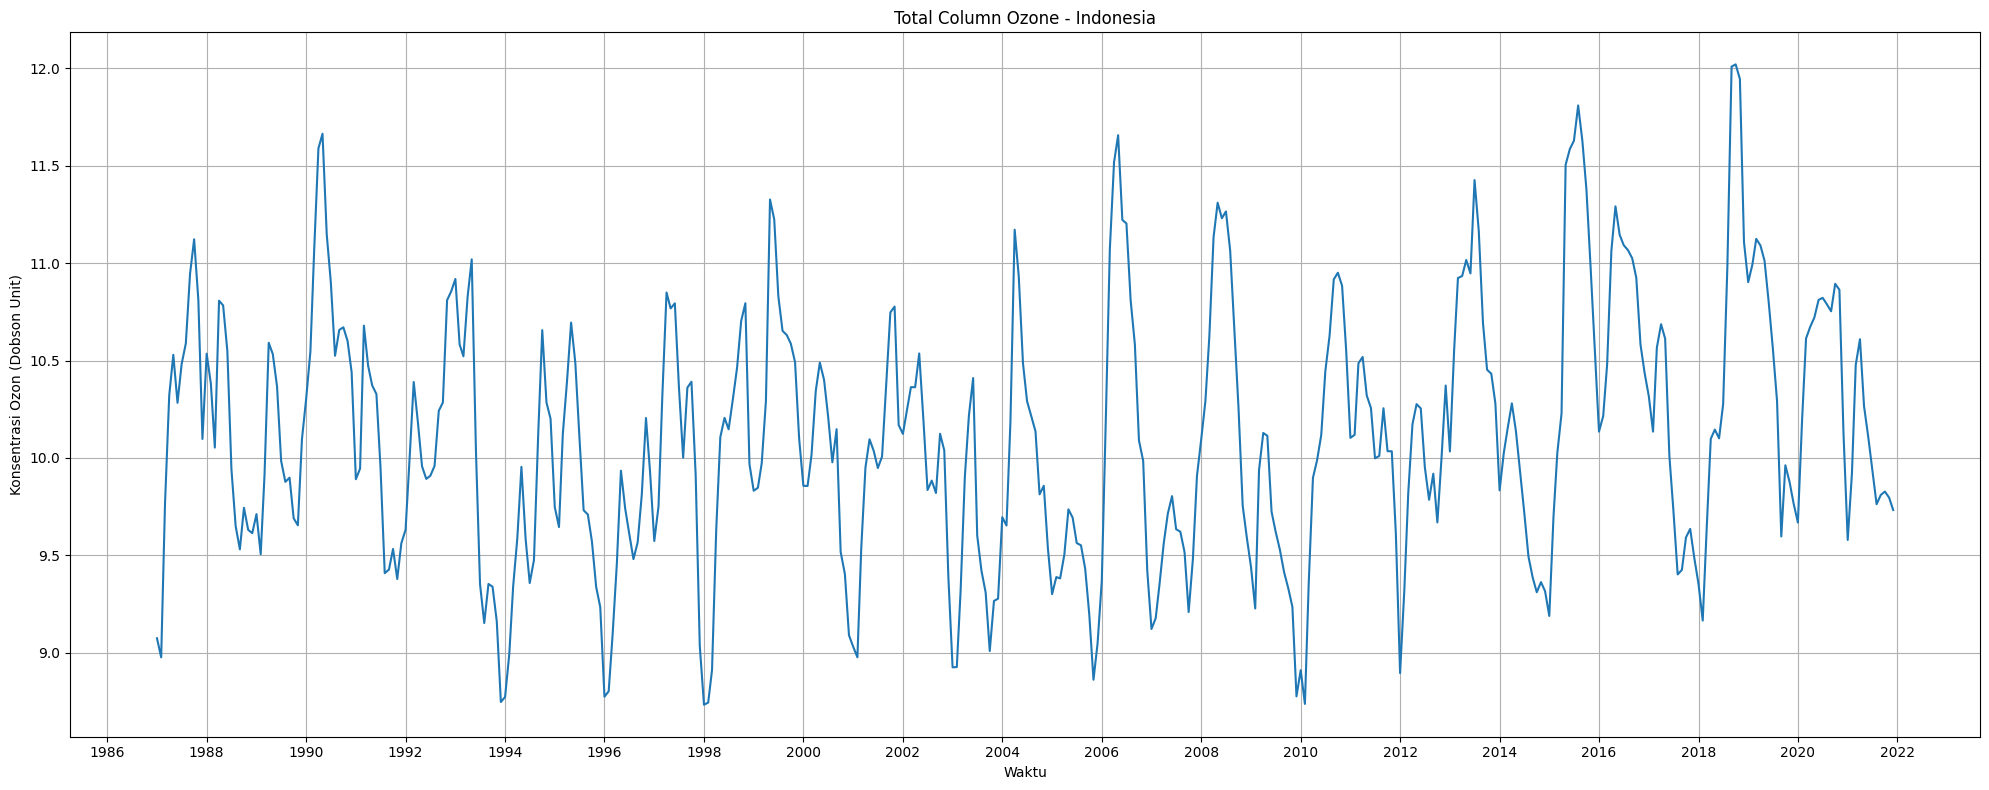

In [2]:
# Baca data dari file Excel
file_path = 'Total Column Ozone.xlsx'
df = pd.read_excel(file_path)

# Ubah kolom 'Date' ke format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')

# Urutkan berdasarkan tanggal (ini penting!)
df = df.sort_values(by='Date')

# Buat grafik plot dari data
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['TCO'], linestyle='-')
plt.title('Total Column Ozone - Indonesia')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi Ozon (Dobson Unit)')
plt.grid(True)

# Format x-axis agar tampil tiap 2 tahun
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Tampilkan plot
plt.tight_layout()
plt.show()

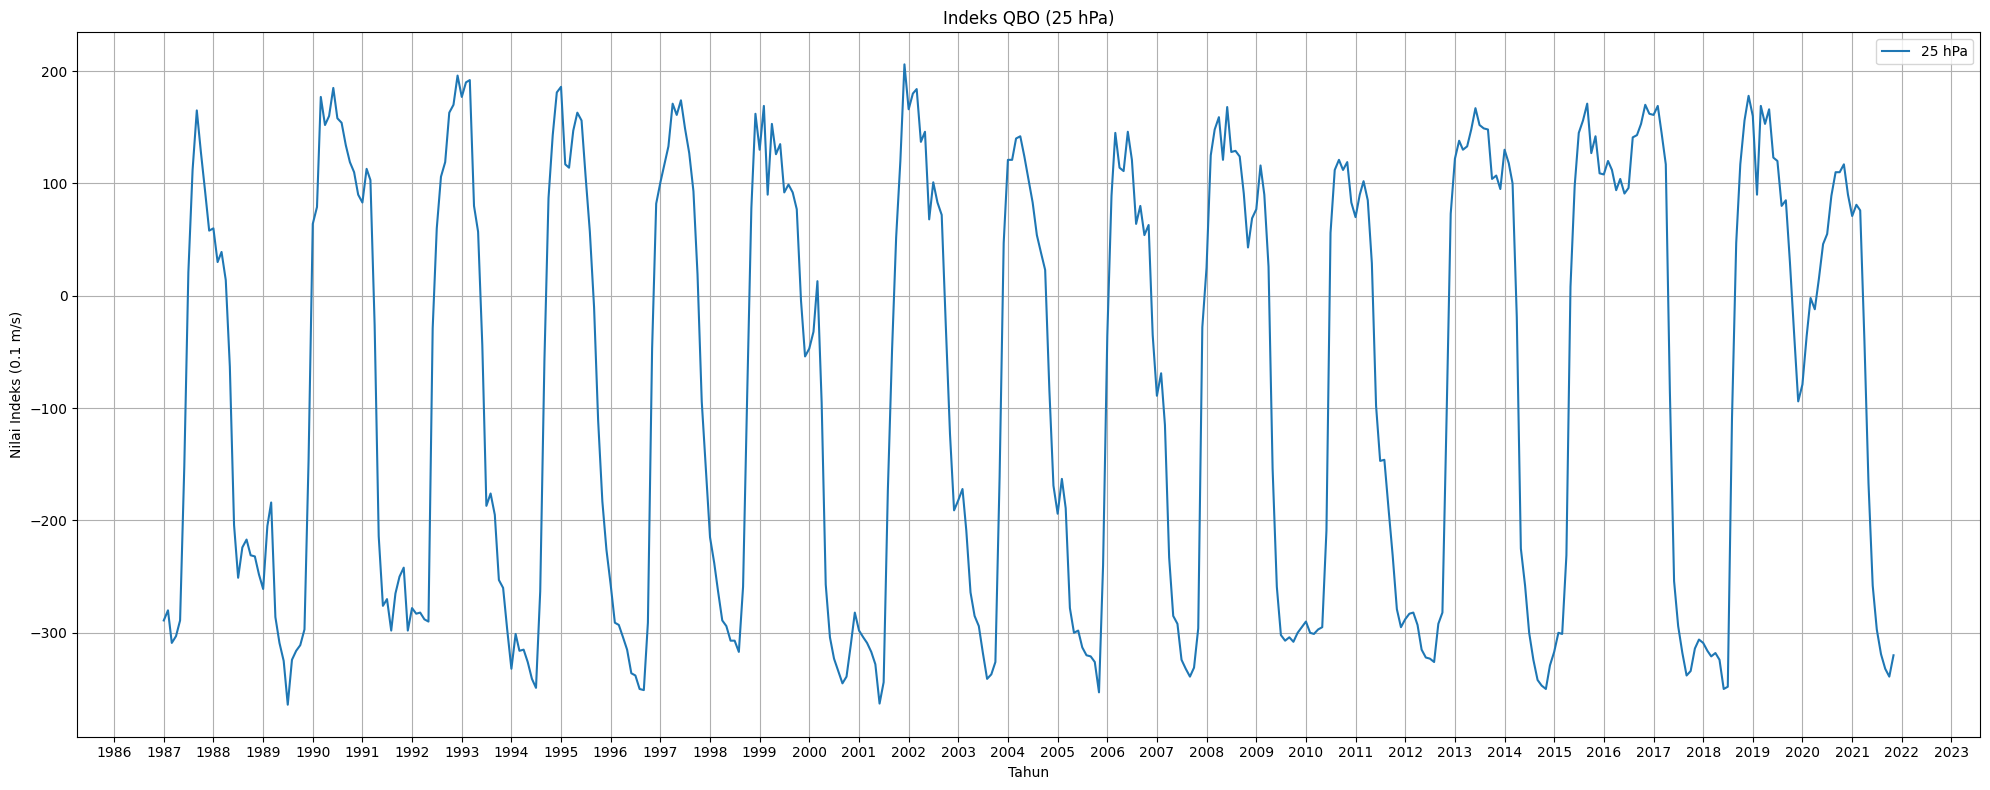

In [3]:
# Load data dari file Excel
file_path2 = 'QBO Data.xlsx'
df2 = pd.read_excel(file_path2)

# Ubah kolom 'Date' ke format datetime
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')

# Urutkan berdasarkan tanggal (ini penting!)
df2 = df2.sort_values(by='Date')

# Filter data dari tahun 1990 sampai 2021
start_date2 = '1987-01-01'
end_date2 = '2021-12-01'
df_filtered2 = df2[(df2['Date'] >= start_date2) & (df2['Date'] <= end_date2)]

# Plot data QBO 25 hPa
plt.figure(figsize=(20, 8))
plt.plot(df_filtered2['Date'], df_filtered2['25 hPa'], label='25 hPa', linestyle='-')

# Format x-axis agar tampil tiap 2 tahun
locator = mdates.YearLocator(1)  # Setiap 2 tahun
formatter = mdates.DateFormatter('%Y')

plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Indeks QBO (25 hPa)')
plt.xlabel('Tahun')
plt.ylabel('Nilai Indeks (0.1 m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

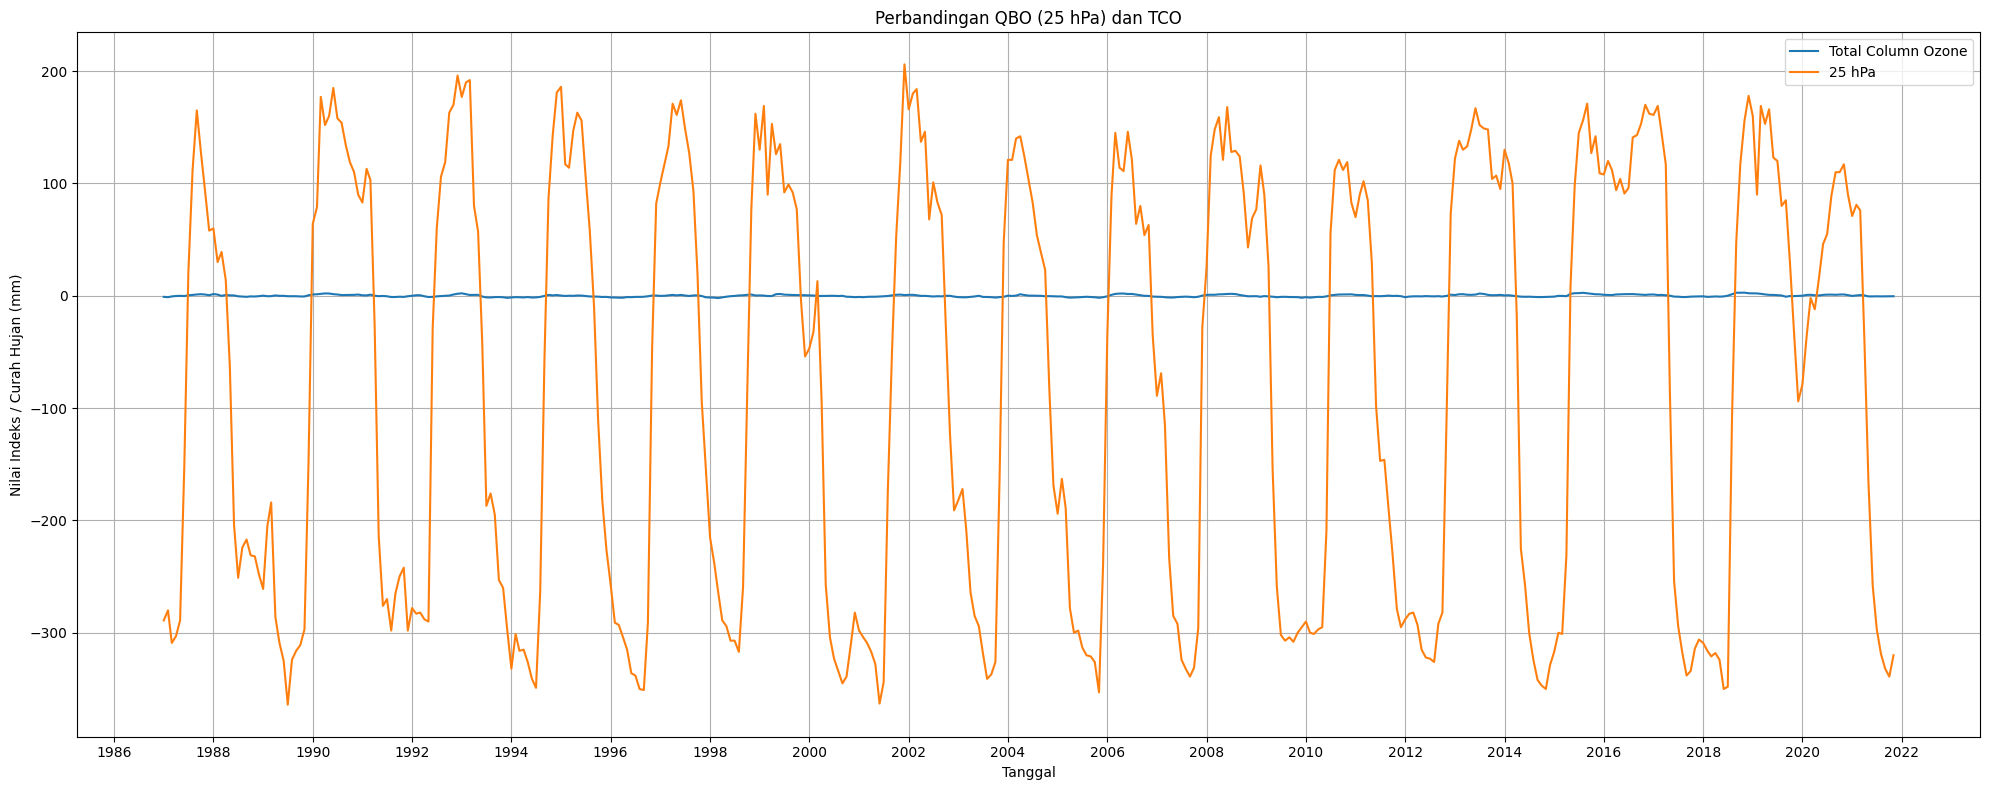

In [4]:
# ===== BACA DATA TOTAL COLUMN OZONE =====
file_path = 'Ozone_Anomaly.xlsx'
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')
df = df.sort_values(by='Date')

# ===== BACA DATA QBO =====
file_path2 = 'QBO Data.xlsx'
df2 = pd.read_excel(file_path2)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')
df2 = df2.sort_values(by='Date')
df_filtered2 = df2[(df2['Date'] >= '1987-01-01') & (df2['Date'] <= '2021-12-01')]

# ===== PLOT GABUNGAN =====
plt.figure(figsize=(20, 8))

# Curah hujan
plt.plot(df['Date'], df['Anomaly'], label='Total Column Ozone', linestyle='-')

# QBO 25 hPa
plt.plot(df_filtered2['Date'], df_filtered2['25 hPa'], label='25 hPa', linestyle='-')

# Format x-axis agar tampil tiap 2 tahun
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Perbandingan QBO (25 hPa) dan TCO')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Indeks / Curah Hujan (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

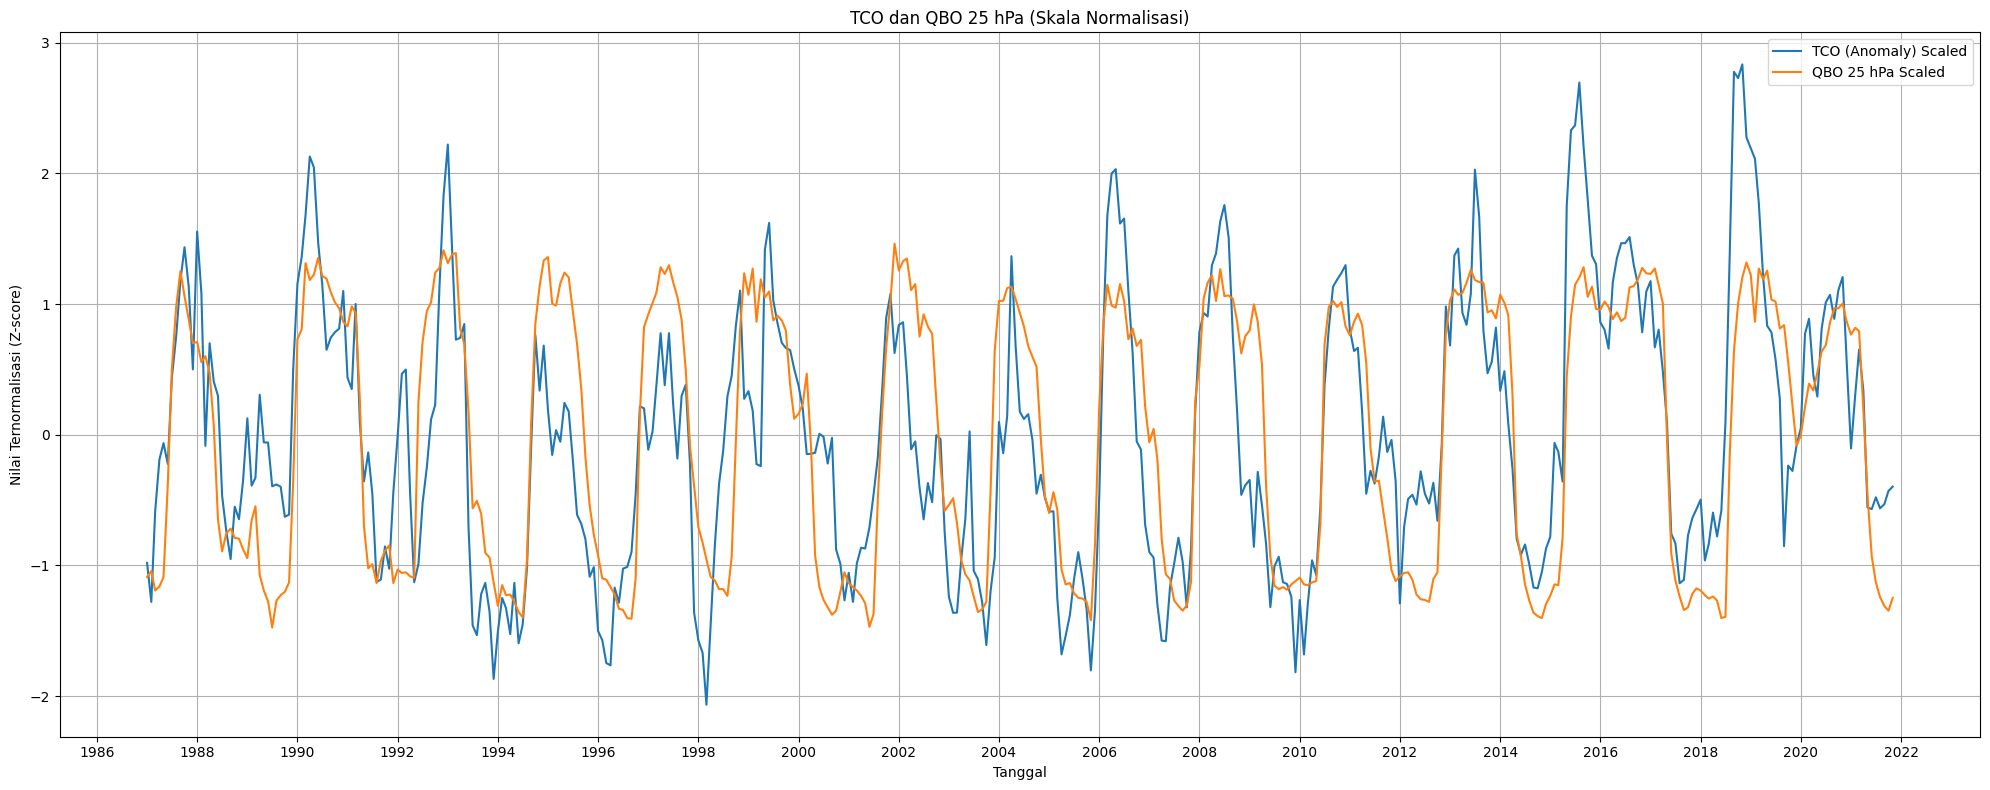

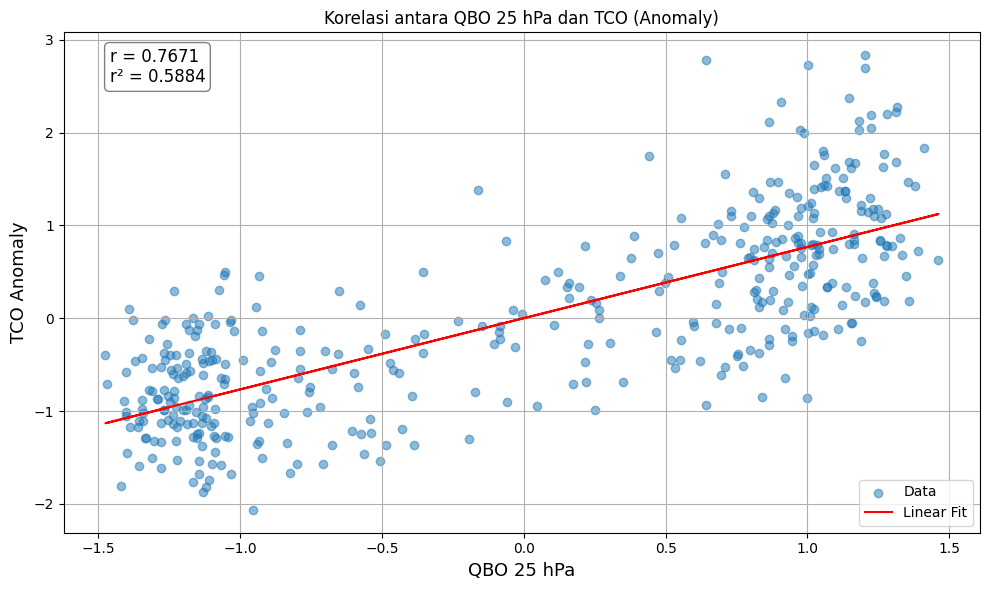

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

# ====== BACA DATA TOTAL COLUMN OZONE ======
df = pd.read_excel('Ozone_Anomaly.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')
df = df.sort_values(by='Date')

# ====== BACA DATA QBO ======
df2 = pd.read_excel('QBO Data.xlsx')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')
df2 = df2.sort_values(by='Date')

# ====== FILTER QBO SESUAI RANGE TCO ======
df2_filtered = df2[(df2['Date'] >= '1987-01-01') & (df2['Date'] <= '2021-12-01')]

# ====== MERGE ======
merged_df = pd.merge(df, df2_filtered, on='Date', how='inner')

# ====== NORMALISASI ======
scaler = StandardScaler()
merged_df[['Anomaly_scaled', 'QBO_25hPa_scaled']] = scaler.fit_transform(
    merged_df[['Anomaly', '25 hPa']]
)

# ============================
# 1. PLOT GRAFIK GARIS NORMALISASI
# ============================
plt.figure(figsize=(20, 8))

plt.plot(merged_df['Date'], merged_df['Anomaly_scaled'], label='TCO (Anomaly) Scaled', linestyle='-')
plt.plot(merged_df['Date'], merged_df['QBO_25hPa_scaled'], label='QBO 25 hPa Scaled', linestyle='-')

# Format waktu x-axis
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('TCO dan QBO 25 hPa (Skala Normalisasi)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Ternormalisasi (Z-score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================
# 2. SCATTER PLOT DAN r-squared UNTUK 25 hPa
# ============================

# Variabel x dan y
x = merged_df['QBO_25hPa_scaled']
y = merged_df['Anomaly_scaled']

# Hitung regresi linier
slope, intercept, r, p_value, std_err = linregress(x, y)
r_squared = r ** 2
regression_line = slope * x + intercept

# Plot scatter + garis regresi
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, regression_line, color='red', label='Linear Fit')

# Tampilkan r dan r^2
plt.text(0.05, 0.9, f"r = {r:.4f}\nr² = {r_squared:.4f}", transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.title('Korelasi antara QBO 25 hPa dan TCO (Anomaly)')
plt.xlabel('QBO 25 hPa', fontsize=13)
plt.ylabel('TCO Anomaly', fontsize=13)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

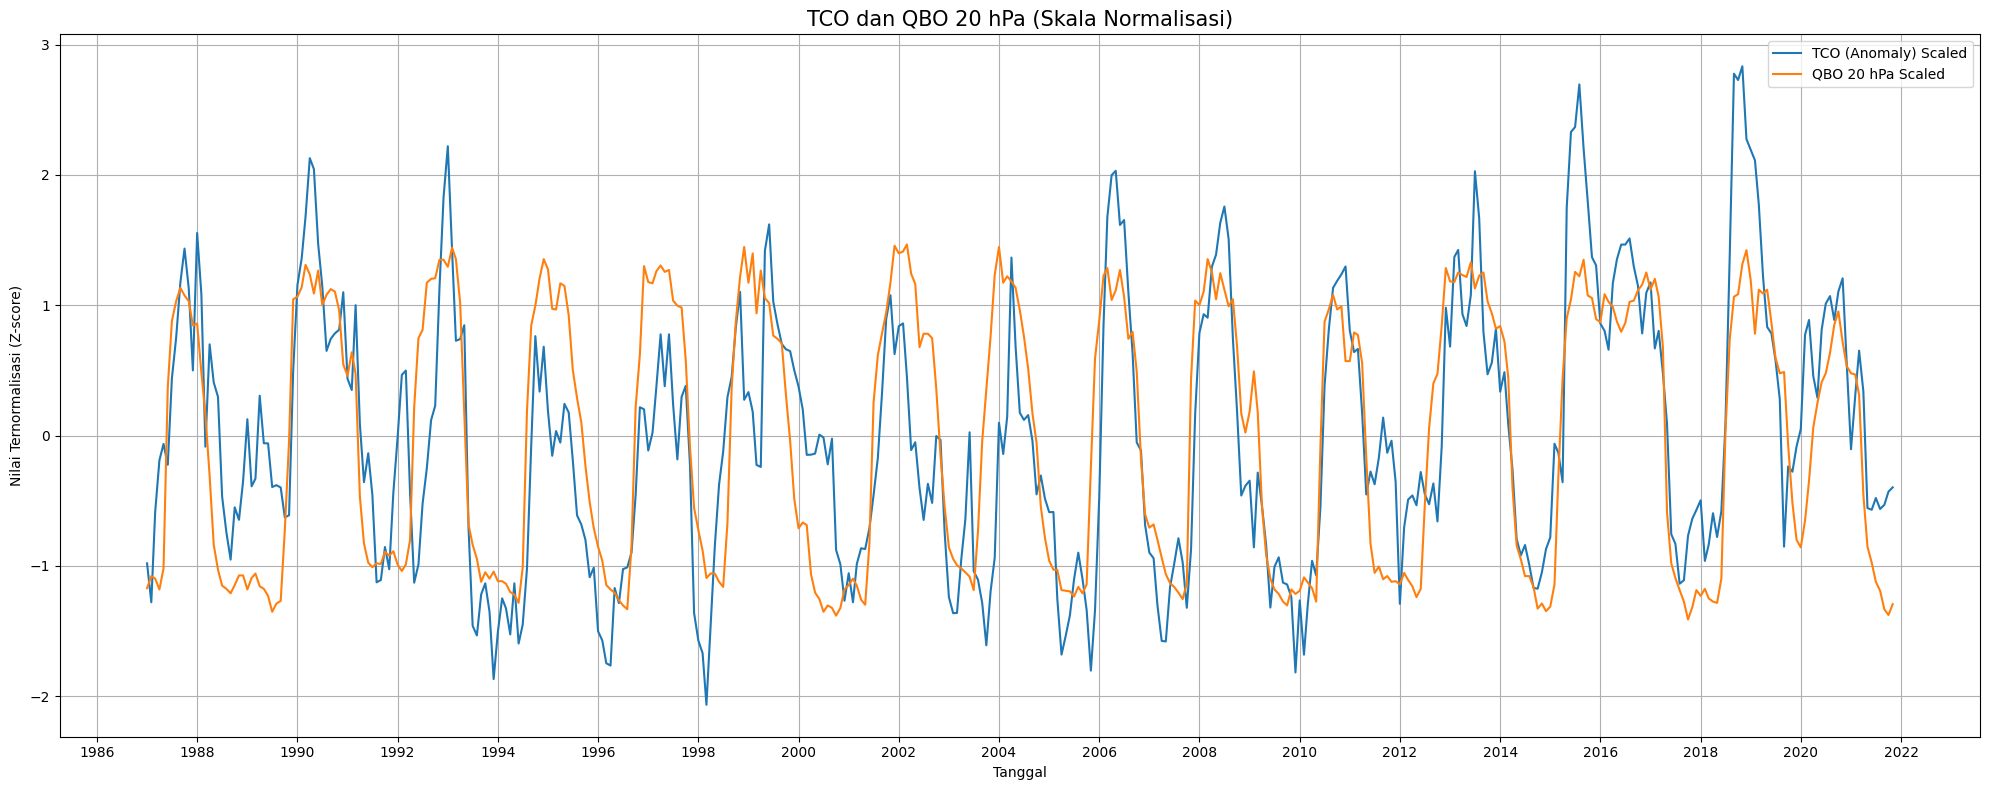

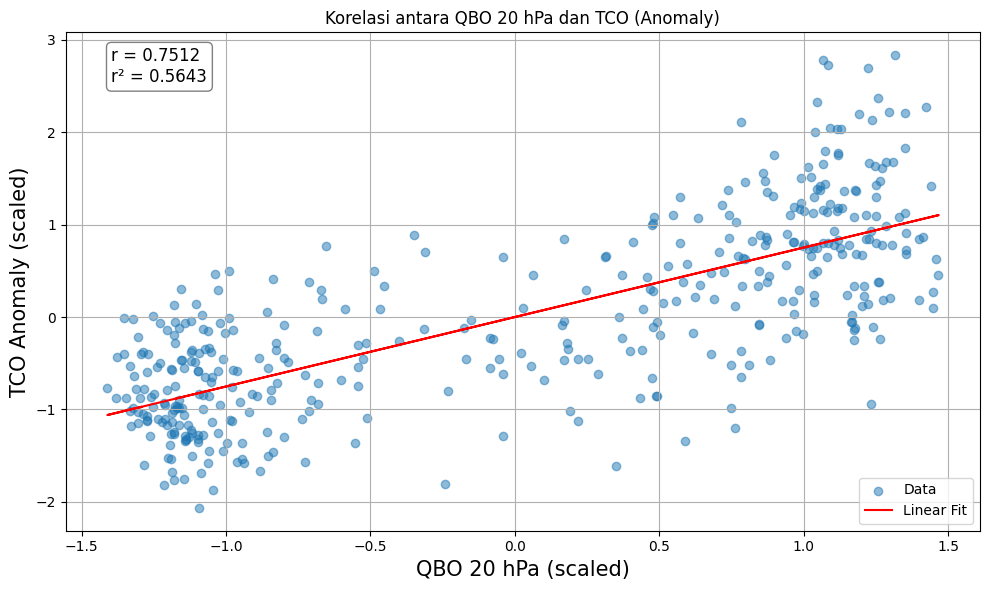

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

# ====== BACA DATA TOTAL COLUMN OZONE ======
df = pd.read_excel('Ozone_Anomaly.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')
df = df.sort_values(by='Date')

# ====== BACA DATA QBO ======
df2 = pd.read_excel('QBO Data.xlsx')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')
df2 = df2.sort_values(by='Date')

# ====== FILTER QBO SESUAI RANGE TCO ======
df2_filtered = df2[(df2['Date'] >= '1987-01-01') & (df2['Date'] <= '2021-12-01')]

# ====== MERGE ======
merged_df = pd.merge(df, df2_filtered, on='Date', how='inner')

# ====== NORMALISASI ======
scaler = StandardScaler()
merged_df[['Anomaly_scaled', 'QBO_20hPa_scaled']] = scaler.fit_transform(
    merged_df[['Anomaly', '20 hPa']]
)

# ============================
# 1. PLOT GRAFIK GARIS NORMALISASI
# ============================
plt.figure(figsize=(20, 8))

plt.plot(merged_df['Date'], merged_df['Anomaly_scaled'], label='TCO (Anomaly) Scaled', linestyle='-')
plt.plot(merged_df['Date'], merged_df['QBO_20hPa_scaled'], label='QBO 20 hPa Scaled', linestyle='-')

# Format waktu x-axis
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('TCO dan QBO 20 hPa (Skala Normalisasi)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Ternormalisasi (Z-score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================
# 2. SCATTER PLOT DAN r-squared UNTUK 20 hPa
# ============================

# Variabel x dan y
x = merged_df['QBO_20hPa_scaled']
y = merged_df['Anomaly_scaled']

# Hitung regresi linier
slope, intercept, r, p_value, std_err = linregress(x, y)
r_squared = r ** 2
regression_line = slope * x + intercept

# Plot scatter + garis regresi
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, regression_line, color='red', label='Linear Fit')

# Tampilkan r dan r^2
plt.text(0.05, 0.9, f"r = {r:.4f}\nr² = {r_squared:.4f}", transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.title('Korelasi antara QBO 20 hPa dan TCO (Anomaly)')
plt.xlabel('QBO 20 hPa (scaled)', fontsize=15)
plt.ylabel('TCO Anomaly (scaled)', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

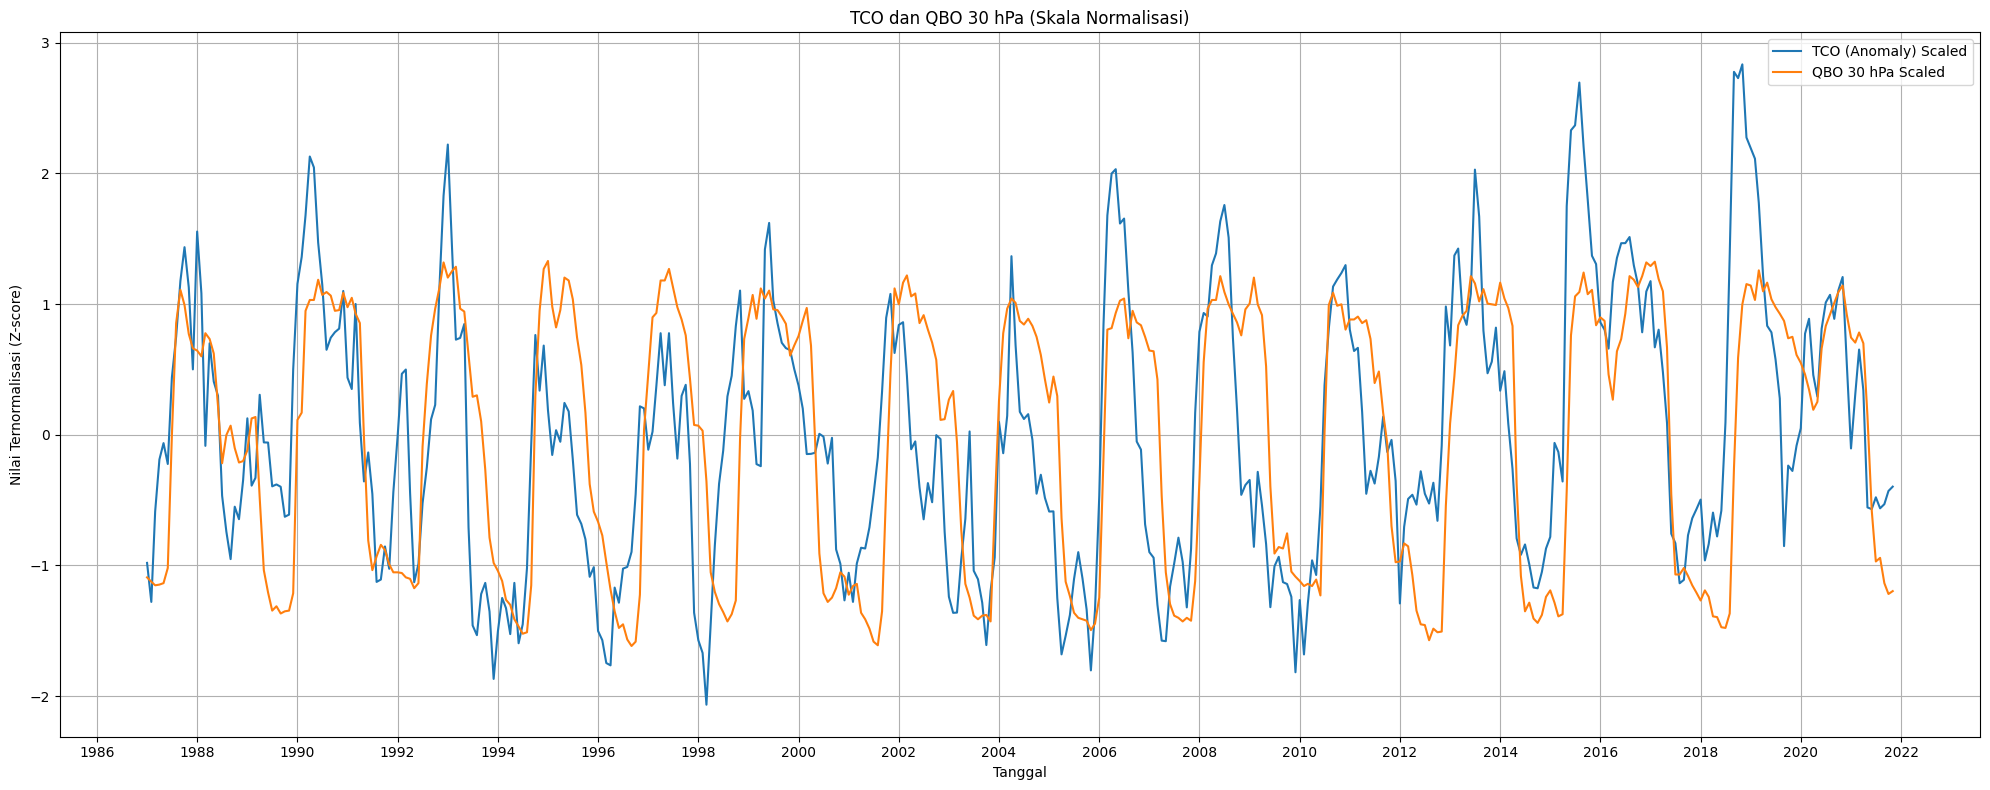

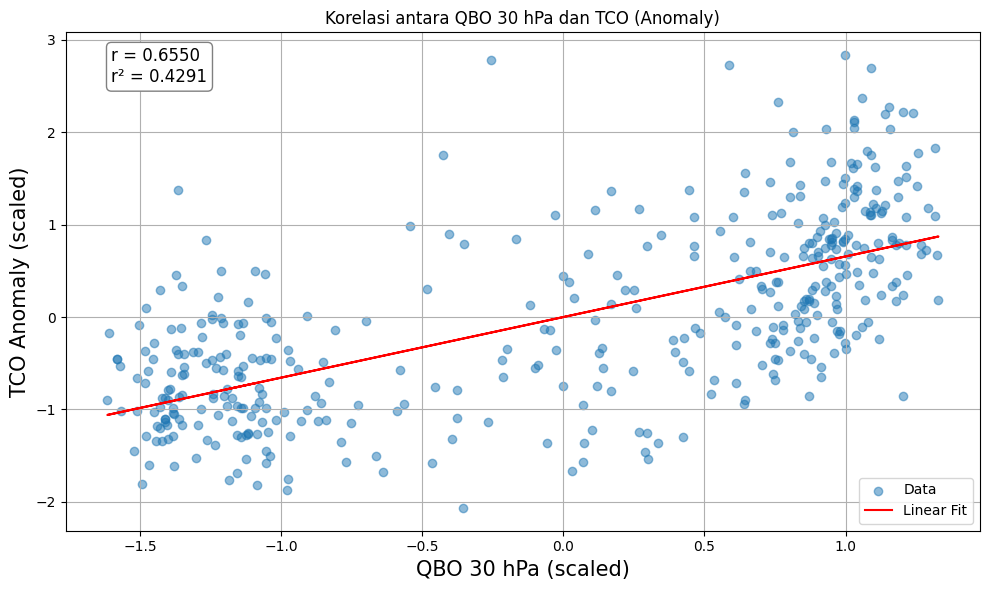

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

# ====== BACA DATA TOTAL COLUMN OZONE ======
df = pd.read_excel('Ozone_Anomaly.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%Y')
df = df.sort_values(by='Date')

# ====== BACA DATA QBO ======
df2 = pd.read_excel('QBO Data.xlsx')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d%m%Y')
df2 = df2.sort_values(by='Date')

# ====== FILTER QBO SESUAI RANGE TCO ======
df2_filtered = df2[(df2['Date'] >= '1987-01-01') & (df2['Date'] <= '2021-12-01')]

# ====== MERGE ======
merged_df = pd.merge(df, df2_filtered, on='Date', how='inner')

# ====== NORMALISASI ======
scaler = StandardScaler()
merged_df[['Anomaly_scaled', 'QBO_30hPa_scaled']] = scaler.fit_transform(
    merged_df[['Anomaly', '30 hPa']]
)

# ============================
# 1. PLOT GRAFIK GARIS NORMALISASI
# ============================
plt.figure(figsize=(20, 8))

plt.plot(merged_df['Date'], merged_df['Anomaly_scaled'], label='TCO (Anomaly) Scaled', linestyle='-')
plt.plot(merged_df['Date'], merged_df['QBO_30hPa_scaled'], label='QBO 30 hPa Scaled', linestyle='-')

# Format waktu x-axis
locator = mdates.YearLocator(2)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('TCO dan QBO 30 hPa (Skala Normalisasi)')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Ternormalisasi (Z-score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================
# 2. SCATTER PLOT DAN r-squared UNTUK 30 hPa
# ============================

# Variabel x dan y
x = merged_df['QBO_30hPa_scaled']
y = merged_df['Anomaly_scaled']

# Hitung regresi linier
slope, intercept, r, p_value, std_err = linregress(x, y)
r_squared = r ** 2
regression_line = slope * x + intercept

# Plot scatter + garis regresi
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, regression_line, color='red', label='Linear Fit')

# Tampilkan r dan r^2
plt.text(0.05, 0.9, f"r = {r:.4f}\nr² = {r_squared:.4f}", transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.title('Korelasi antara QBO 30 hPa dan TCO (Anomaly)')
plt.xlabel('QBO 30 hPa (scaled)', fontsize=15)
plt.ylabel('TCO Anomaly (scaled)', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Valid data points: 419
Tahun unik: [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021]
WTC.shape: (85, 419)
len(t_years): 419
len(period): 85
t_years[:10]: [1987 1987 1987 1987 1987 1987 1987 1987 1987 1987]
t_years[-10:]: [2021 2021 2021 2021 2021 2021 2021 2021 2021 2021]
np.unique(t_years): [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021]


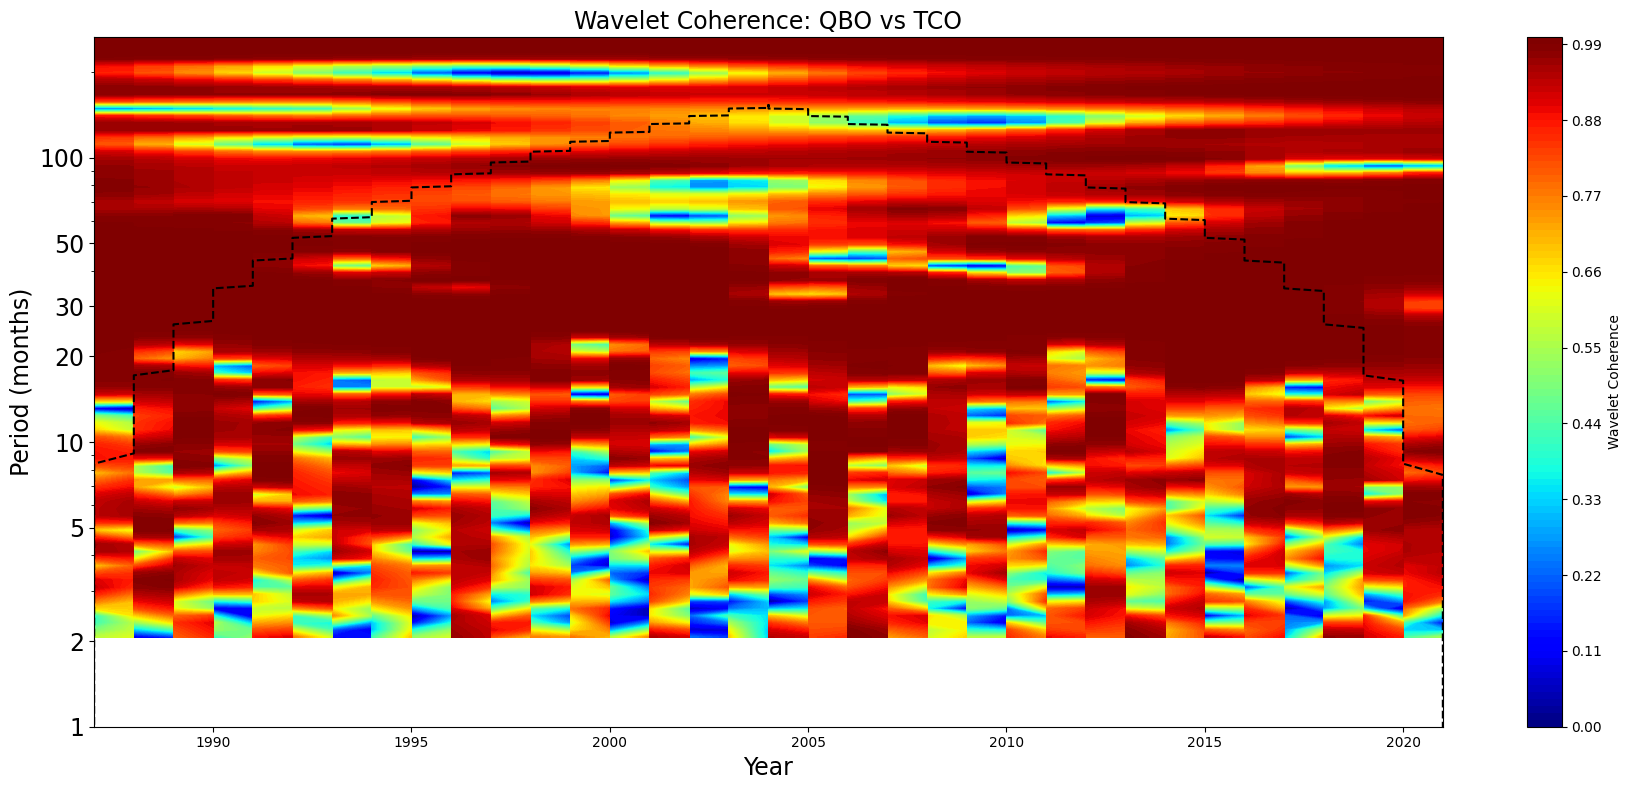

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycwt import wavelet

# --- BACA DATA ---
df3 = pd.read_excel("Data Gabungan.xlsx")

# Pastikan kolom tanggal terbaca dengan benar
if 'Date' not in df3.columns:
    print(f"Kolom yang ada: {df3.columns}")
    raise ValueError("Kolom 'Date' tidak ditemukan di file Excel")

df3['Date'] = pd.to_datetime(df3['Date'])
df3.set_index('Date', inplace=True)

# Ambil data
tco = df3['TCO'].values
qbo = df3['QBO'].values
time = df3.index.to_pydatetime()

# Filter NaN (pastikan dua variabel valid)
valid = ~np.isnan(tco) & ~np.isnan(qbo)
tco = tco[valid]
qbo = qbo[valid]
time = np.array(time)[valid]

print(f"Valid data points: {len(tco)}")
print(f"Tahun unik: {np.unique([t.year for t in time])}")

# Normalisasi
def normalize(x): return (x - np.mean(x)) / np.std(x)
tco = normalize(tco)
qbo = normalize(qbo)

# Fungsi smoothing wavelet
def smooth_wavelet(W, dt, dj, scales):
    import scipy.signal
    m, n = W.shape
    wavelet_avg = scipy.signal.convolve2d(W, np.ones((1, 5))/5, mode='same')  # smoothing time
    for i in range(m):
        s = int(np.round(scales[i] / dt))
        if s > 1:
            kernel = np.ones((s, 1)) / s
            wavelet_avg[i, :] = scipy.signal.convolve(wavelet_avg[i, :], kernel[:, 0], mode='same')
    return wavelet_avg

# Fungsi hitung & plot WTC
def compute_wtc(x, y, time, label, sig_threshold=0.8):
    dt = 1
    dj = 1/12
    s0 = 2 * dt
    J = 7 / dj
    mother = wavelet.Morlet()

    Wx, scales, freqs, coi, _, _ = wavelet.cwt(x, dt, dj, s0, J, mother)
    Wy, _, _, _, _, _ = wavelet.cwt(y, dt, dj, s0, J, mother)
    Wxy = Wx * np.conj(Wy)

    Sx = smooth_wavelet(np.abs(Wx) ** 2 / scales[:, None], dt, dj, scales)
    Sy = smooth_wavelet(np.abs(Wy) ** 2 / scales[:, None], dt, dj, scales)
    Sxy = smooth_wavelet(Wxy / scales[:, None], dt, dj, scales)

    WTC = np.abs(Sxy) ** 2 / (Sx * Sy)

    t_years = np.array([t.year for t in time])
    period = 1 / freqs

    print(f"WTC.shape: {WTC.shape}")
    print(f"len(t_years): {len(t_years)}")
    print(f"len(period): {len(period)}")
    print(f"t_years[:10]: {t_years[:10]}")
    print(f"t_years[-10:]: {t_years[-10:]}")
    print(f"np.unique(t_years): {np.unique(t_years)}")

    # Pastikan orientasi WTC benar
    if WTC.shape[1] != len(t_years):
        WTC = WTC.T
        print(f"WTC di-transpose: {WTC.shape}")

    plt.figure(figsize=(18, 8))
    plt.contourf(t_years, period, WTC, 100, cmap='jet', vmax=0.99)
    plt.colorbar(label='Wavelet Coherence')
    plt.contour(t_years, period, WTC, levels=[sig_threshold], colors='white', linewidths=0, linestyles='dashed')
    plt.plot(t_years, coi, 'k--', label='Cone of Influence')  # HILANGKAN GARIS INI
    plt.yscale('log')
    plt.ylim([1, max(period)])
    plt.yticks([1, 2, 5, 10, 20, 30, 50, 100], ['1', '2', '5', '10', '20', '30', '50', '100'], fontsize=17)
    plt.xlabel('Year', fontsize=17)
    plt.ylabel('Period (months)', fontsize=17)
    plt.title(f'Wavelet Coherence: {label}', fontsize=17)
    # plt.legend()  # Opsional: hilangkan legend juga jika sudah tidak ada COI
    plt.tight_layout()
    plt.show()

# Hitung & tampilkan WTC
compute_wtc(qbo, tco, time, 'QBO vs TCO')